In [438]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [439]:
def matrix_factorization(r,K,p,q,steps,alpha,beta):
    q=q.T
    M=len(r)
    N=len(r[0])
    loss_func_prog=[]
    for i in range(steps):
        for i in range(M):
            for j in range(N):
                if(r[i][j]>0):          
                    
                    #e= e+ r[i][j]-np.dot(p[i,:],q[:,j]) This is Gradient Descent(Summation of eij on all values of p and q then updating values)
                #for k in range(K): 
                     #p[i][k]= p[i][k]+ alpha * (2*eij*q[k][j] - beta*p[i][k])
                     #q[k][j]= q[k][j]+ alpha * (2*eij*p[i][k] - beta*q[k][j])
                        
                    eij= r[i][j]-np.dot(p[i,:],q[:,j]) #    Stochastic Gradient Descent is applied (Updating p and q after each eij)
                    for k in range(K):
                        p[i][k]= p[i][k]+ alpha * (2*eij*q[k][j] - beta*p[i][k])
                        q[k][j]= q[k][j]+ alpha * (2*eij*p[i][k] - beta*q[k][j])
        e=0
        for i in range(M):
            for j in range(N):
                if(r[i][j]>0):
                    e=e+pow(r[i][j] - np.dot(p[i,:],q[:,j]), 2) #Loss Function calculation (Sum of Squares Method)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(p[i][k],2) + pow(q[k][j],2) )  #Regularization
        loss_func_prog.append(e)
        if e<0.001:
            break
    nR=np.dot(p,q)

    return nR,loss_func_prog

In [440]:
if __name__=='__main__':
    
    R = np.random.randint(0,6,size=(5,8),dtype='int16')
    steps=1500
    alpha1=0.0001# Learning Rates
    alpha2=0.001
    alpha3=0.01
    beta=0.02 # Regularization rate
    K=2 # Latent Factors
    M=len(R)
    N=len(R[0])
    P = np.random.rand(M,K)*np.random.randint(1,5)
    Q= np.random.rand(N,K)*np.random.randint(1,5)
    print(P)
    p1=P.copy()
    q1=Q.copy()
    nR,err=matrix_factorization(R,K,p1,q1,steps,alpha1,beta)
    p2=P.copy()
    q2=Q.copy()
    nR2,err2 = matrix_factorization(R,K,p2,q2,steps,alpha2,beta)
    p3=P.copy()
    q3=Q.copy()
    nR3,err3 = matrix_factorization(R,K,p3,q3,steps,alpha3,beta)

[[1.99 1.72]
 [0.75 0.11]
 [2.04 2.35]
 [2.57 2.86]
 [1.49 1.48]]


In [441]:
print('Original Ratings:\n',R)
print('\n\nAfter ',steps,'Iterations:')
print('\nAlpha=',alpha1,'\n',nR)
print('\nEstimations in int=\n',np.rint(nR))
print('\nAlpha=',alpha2,'\n',nR2)
print('\nEstimations in int=\n',np.rint(nR2))
print('\nAlpha=',alpha3,'\n',nR3)
print('\nEstimations in int=\n',np.rint(nR3))

Original Ratings:
 [[4 5 0 0 0 0 2 4]
 [5 5 0 5 2 0 5 5]
 [5 1 1 0 5 2 0 1]
 [3 0 4 1 2 4 5 2]
 [0 5 1 4 3 0 4 5]]


After  1500 Iterations:

Alpha= 0.0001 
 [[4.24 3.93 1.79 3.27 2.81 3.1  3.6  3.44]
 [5.2  4.74 2.08 4.07 3.46 3.72 4.28 4.2 ]
 [3.51 3.25 1.47 2.71 2.33 2.55 2.96 2.85]
 [3.66 3.95 2.32 2.41 2.29 3.26 4.05 3.11]
 [4.84 4.57 2.15 3.68 3.19 3.62 4.24 3.95]]

Estimations in int=
 [[4. 4. 2. 3. 3. 3. 4. 3.]
 [5. 5. 2. 4. 3. 4. 4. 4.]
 [4. 3. 1. 3. 2. 3. 3. 3.]
 [4. 4. 2. 2. 2. 3. 4. 3.]
 [5. 5. 2. 4. 3. 4. 4. 4.]]

Alpha= 0.001 
 [[ 4.58  4.22  2.15  4.99  3.26  4.16  2.6   3.66]
 [ 4.83  5.61  2.94  4.39  2.94  5.24  4.69  4.64]
 [ 4.78  1.16  0.38  7.6   4.74  1.98 -2.66  1.63]
 [ 2.72  4.53  2.44  1.46  1.09  3.95  4.91  3.53]
 [ 4.44  4.9   2.55  4.23  2.81  4.62  3.88  4.09]]

Estimations in int=
 [[ 5.  4.  2.  5.  3.  4.  3.  4.]
 [ 5.  6.  3.  4.  3.  5.  5.  5.]
 [ 5.  1.  0.  8.  5.  2. -3.  2.]
 [ 3.  5.  2.  1.  1.  4.  5.  4.]
 [ 4.  5.  3.  4.  3.  5.  4.  4.]

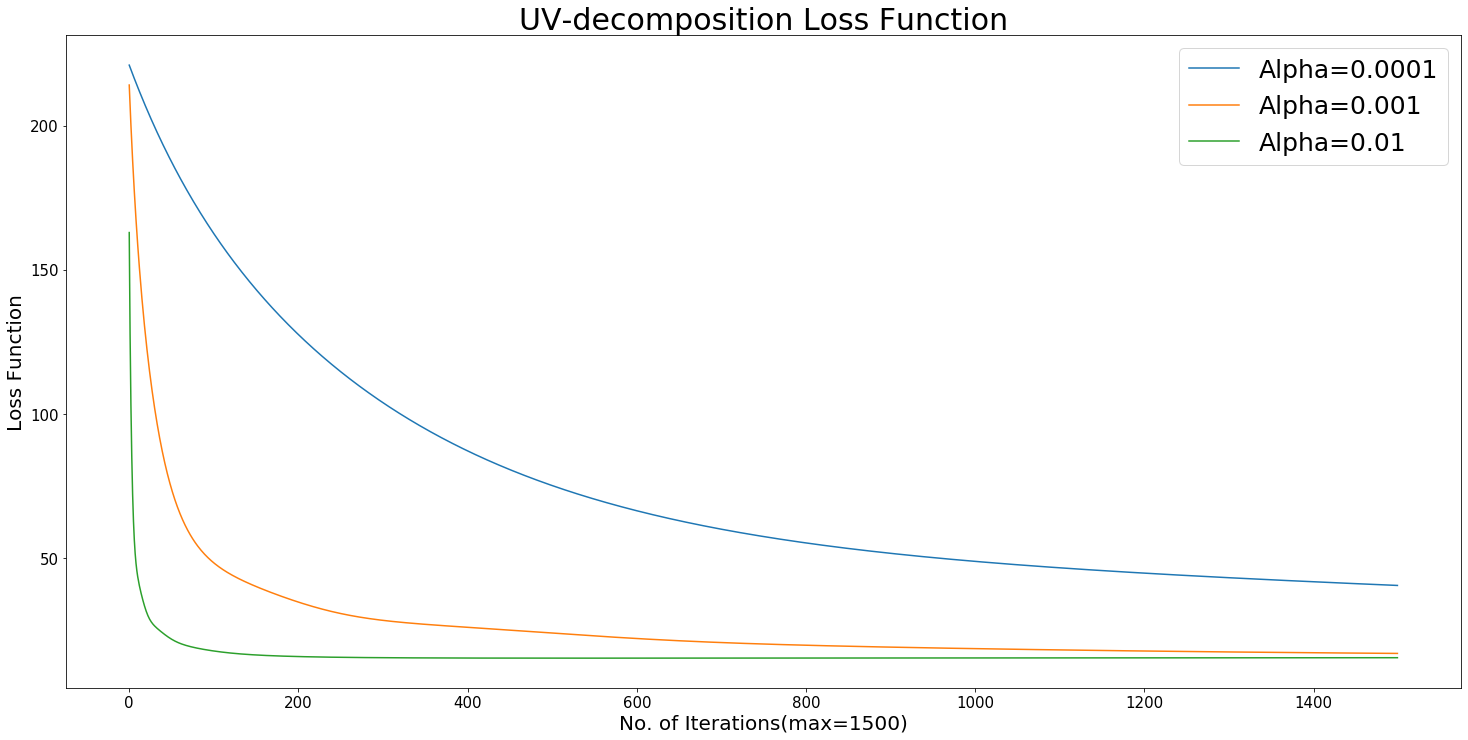

40.51169472423638
16.937739007078346
15.450578385771886


In [442]:
plt.figure(figsize=(25,12))
plt.plot(err,label='Alpha='+str(alpha1))
plt.plot(err2,label='Alpha='+str(alpha2))
plt.plot(err3,label='Alpha='+str(alpha3))
plt.legend(prop={'size':25})
plt.title('UV-decomposition Loss Function',fontdict={'fontsize':30})
plt.xlabel('No. of Iterations(max='+str(steps)+')',fontdict={'fontsize':20})
plt.ylabel('Loss Function',fontdict={'fontsize':20})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

print(err[-1])
print(err2[-1])
print(err3[-1])

In [393]:
a=np.arange(1,7).reshape(3,2)
b=np.arange(1,7).reshape(2,3)
np.dot(a,b)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

In [180]:
f=0
f = f + (beta/2) * ( pow(a[0,:],2) + pow(b[:,0],2)) 
f.sum()
g=0
for k in range(2):
    g = g + (beta/2) * ( pow(a[0][k],2) + pow(b[k][0],2) )
g

0.22